Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

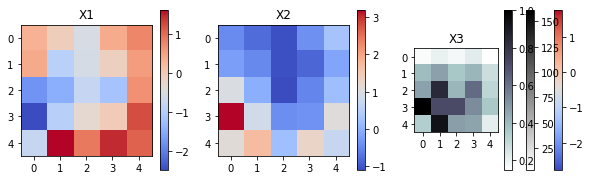

In [1]:
'''
为修饰碎片和骨架分别建立化学空间
'''
import pandas as pd
from codes_for_manuscript_02.my_som_cluster import SOM_learner
from codes_for_manuscript_03.test_fp_similarity import cal_fingerprint, random_sample
from codes_for_manuscript_03.fragments2mol import draw_multi_mol

In [44]:
# 文件smiles去重，需要十几分钟
def caseless_unique_list(TABLE):
    input_list = TABLE["addH_SMILES"].tolist()
    index_list = TABLE["frag_SMILES"].tolist()
    output_list = []
    index_list2 = []
    for i in range(len(input_list)):
        item = input_list[i]
        index = index_list[i]
        if not any(item.lower() == x.lower() for x in output_list):
            output_list.append(item)
            index_list2.append(index)
    TABLE2 = pd.DataFrame({"frag_SMILES":index_list2,"addH_SMILES":output_list})
    return TABLE2

In [ ]:
# 运行, 运行了一次就关闭
run_unique = 0
if run_unique:
    for i in ["decorations","Scaffold"]:
        smi_path = "F:\\WORK\\和外合作\\天宇媛媛毕设\\初始数据\\"+i+".csv"
        new_table = caseless_unique_list(pd.read_csv(smi_path))
        new_table.to_csv("F:\\WORK\\和外合作\\天宇媛媛毕设\\初始数据\\"+i+"_unique.csv")

In [22]:
# 计算分子指纹,大概需要一分钟
# 运行
run_fp = 1
if run_fp:
    fp_tables = {}
    for i in ["decorations","Scaffold"]:
        smi_path = "F:\\WORK\\和外合作\\天宇媛媛毕设\\初始数据\\"+i+"_unique.csv"
        sample_data = random_sample(smi_path,'all')
        smi_list = sample_data.values
        fp_calc = cal_fingerprint(smi_list=smi_list)
        fp_calc.RDKitTopological(fpSize=1024)
        fp_tables[i] = fp_calc.fp_TopoFingerprint.values


5.406899248801705


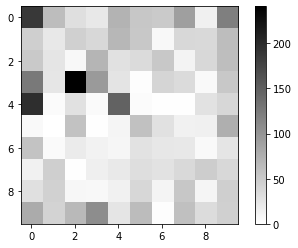

In [23]:
# 训练各自的SOM化学空间
## decorations, 大概一分钟
som_learner1 = SOM_learner(dataset=fp_tables["decorations"],
                          size=10,
                          trained_som=None,
                          max_iter=1000,
                          sigma=3,
                          learning_rate=0.5,
                          neighborhood_function='gaussian',
                          pca_initialization=1,
                          random_seed=2023)

som_learner1.cluster_results(True)
som_learner1.save("F:\\WORK\\和外合作\\天宇媛媛毕设\\som化学空间\\decorations")
print(som_learner1.error)

8.166230629220202


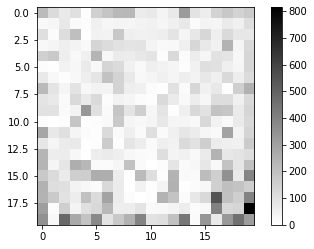

In [24]:
## Scaffold, 大概五分钟
som_learner1 = SOM_learner(dataset=fp_tables["Scaffold"],
                           size=20,
                           trained_som=None,
                           max_iter=1000,
                           sigma=3,
                           learning_rate=0.5,
                           neighborhood_function='gaussian',
                           pca_initialization=1,
                           random_seed=2023)

som_learner1.cluster_results(True)
som_learner1.save("F:\\WORK\\和外合作\\天宇媛媛毕设\\som化学空间\\Scaffold")
print(som_learner1.error)

In [85]:
# 观察decorations化学子空间

file1 = "F:\\WORK\\和外合作\\天宇媛媛毕设\\som化学空间\\decorations\\size10_sigma3_random_seed2023_cluster_results.csv"
file11 = "F:\\WORK\\和外合作\\天宇媛媛毕设\\初始数据\\decorations_unique.csv"
smiles_table1 = pd.read_csv(file11,index_col=0)
space_table1 = pd.read_csv(file1)
decorations_space = pd.concat([smiles_table1,space_table1],axis=1)
decorations_space.to_csv("F:\\WORK\\和外合作\\天宇媛媛毕设\\som化学空间\\decorations\\decorations_space.csv", index=False)
decorations_space.head()

,frag_SMILES,addH_SMILES,cluster_index,map_x,map_y
0,['FC(F)(F)C[Cs]'],CC(F)(F)F,44,4,4
1,[Cs]C(=O)NN(O)O,O=CNN(O)O,77,7,7
2,['[Cs]Sc1ncc[nH]1'],Sc1ncc[nH]1,29,2,9
3,['CC(O)C(C)N[Cs]'],CC(N)C(C)O,83,8,3
4,['OCC(O)O[Cs]'],OCC(O)O,62,6,2


d:\tristan\anaconda3\envs\awen\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


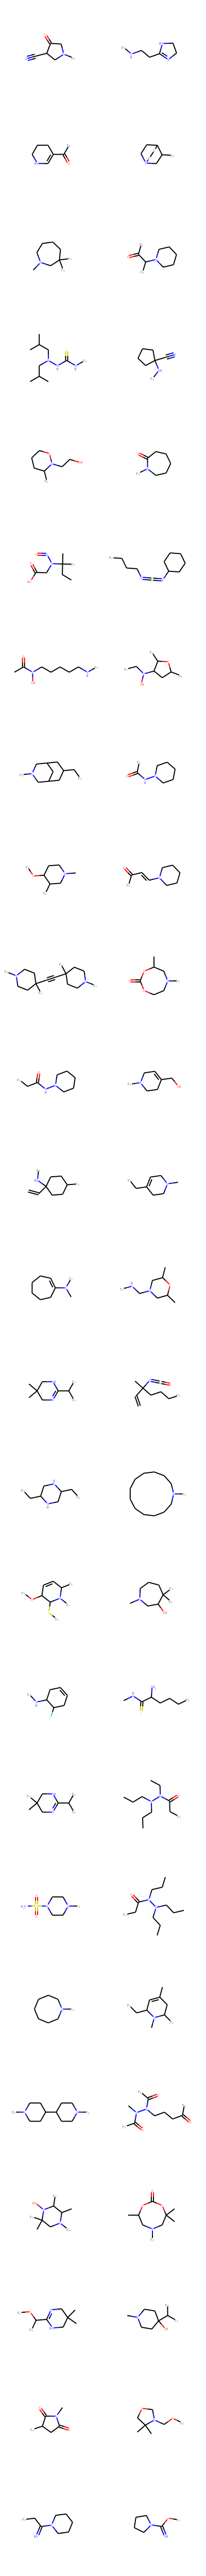

In [91]:
smi_list11 = decorations_space[decorations_space
                               ["cluster_index"] == 52]["frag_SMILES"].tolist()
draw_multi_mol(smi_list11, "smiles",2)

d:\tristan\anaconda3\envs\awen\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


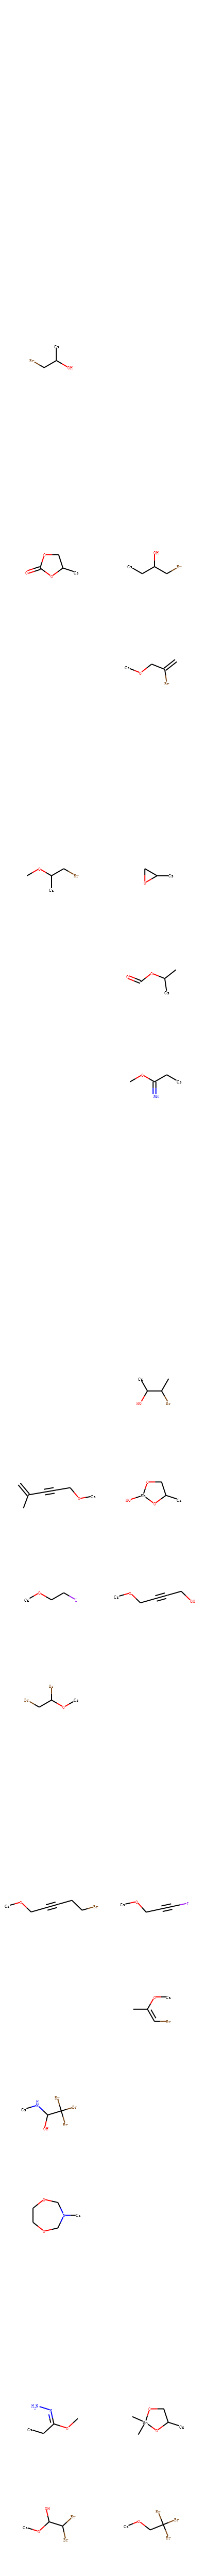

In [87]:
smi_list12 = decorations_space[decorations_space["cluster_index"] == 51]["frag_SMILES"].tolist()
draw_multi_mol(smi_list12, "smiles",2)

In [93]:
# 观察Scaffold化学子空间

file1 = "F:\\WORK\\和外合作\\天宇媛媛毕设\\som化学空间\\Scaffold\\size20_sigma3_random_seed2023_cluster_results.csv"
file11 = "F:\\WORK\\和外合作\\天宇媛媛毕设\\初始数据\\Scaffold_unique.csv"
smiles_table1 = pd.read_csv(file11,index_col=0)
space_table1 = pd.read_csv(file1)
decorations_space = pd.concat([smiles_table1,space_table1],axis=1)
decorations_space.to_csv("F:\\WORK\\和外合作\\天宇媛媛毕设\\som化学空间\\Scaffold\\Scaffold_space.csv", index=False)
decorations_space.head()

,frag_SMILES,addH_SMILES,cluster_index,map_x,map_y
0,[Fr]Cc1cc(O)c(O)cc1C[Fr],Cc1cc(O)c(O)cc1C,63,3,3
1,[Fr]N1CC(=O)C(C#N)C1,N#CC1CNCC1=O,52,2,12
2,[Fr]C1Oc2nc(S)nc(O)c2CC1[Fr],Oc1nc(S)nc2c1CCCO2,383,19,3
3,[Fr]c1c(C)[nH]c(C)c([Fr])c1=O,Cc1cc(=O)cc(C)[nH]1,46,2,6
4,[Fr]C1CC23CC=CCC2(C1)C3,C1=CCC23CCCC2(C1)C3,116,5,16


d:\tristan\anaconda3\envs\awen\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


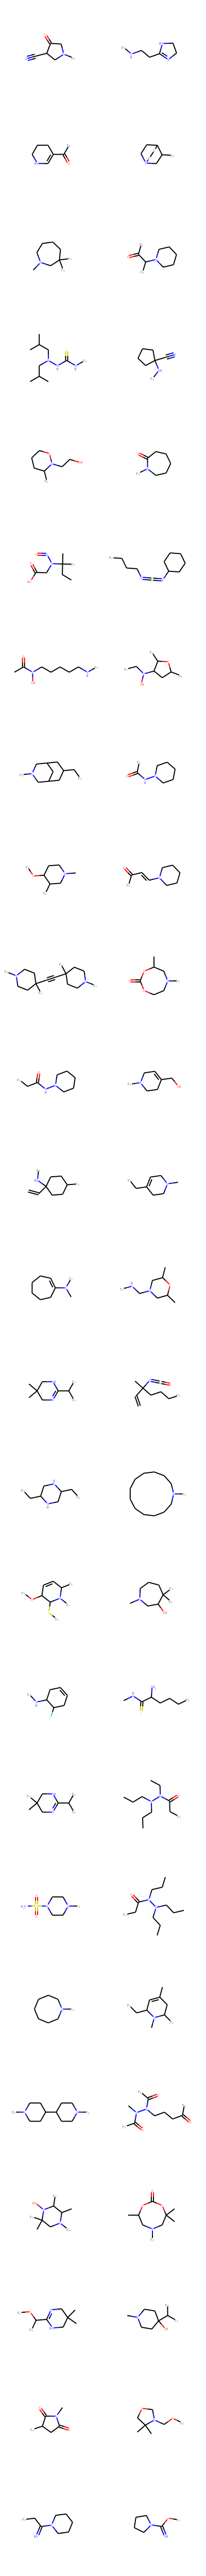

In [94]:
smi_list11 = decorations_space[decorations_space
                               ["cluster_index"] == 52]["frag_SMILES"].tolist()
draw_multi_mol(smi_list11, "smiles",2)

d:\tristan\anaconda3\envs\awen\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


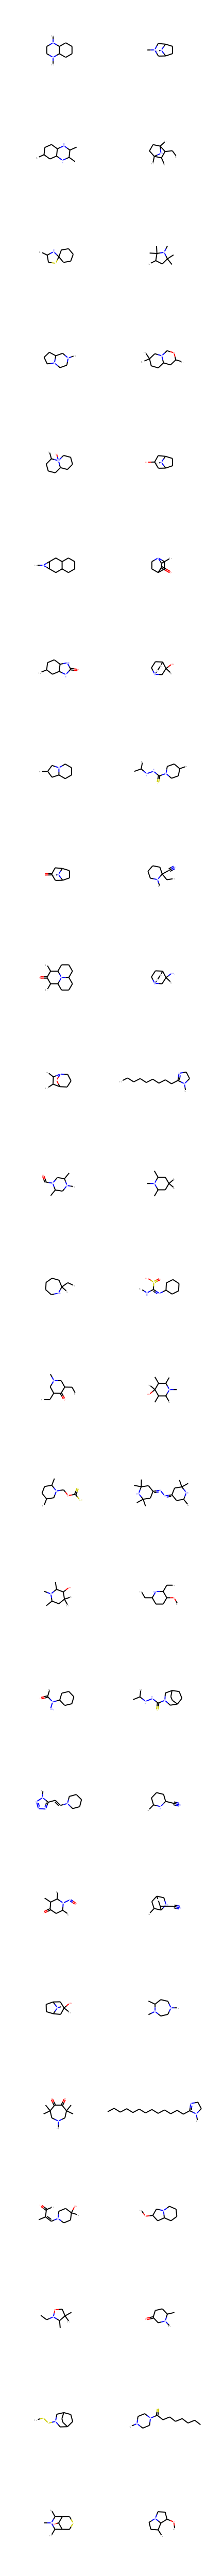

In [95]:
smi_list12 = decorations_space[decorations_space["cluster_index"] == 51]["frag_SMILES"].tolist()
draw_multi_mol(smi_list12, "smiles",2)

array([[ 3,  2, 19, ...,  4, 16, 12],
       [ 3, 12,  3, ..., 19,  0, 12]], dtype=int64)